# Regression

In [21]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [22]:
!curl https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv --output moore.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  2302    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  2302  100  2302    0     0   2252      0  0:00:01  0:00:01 --:--:--  2256


In [23]:
data = pd.read_csv('moore.csv', header=None)
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [24]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1]

In [25]:
X.shape, Y.shape

((162, 1), (162,))

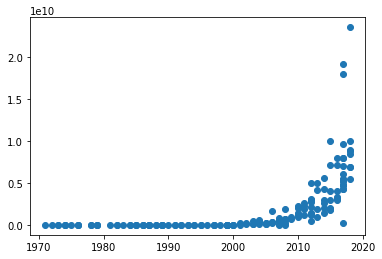

In [26]:
plt.scatter(X, Y)

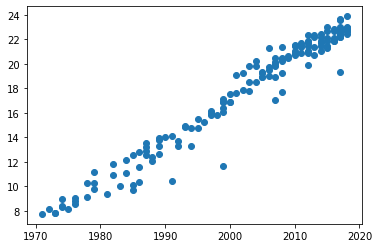

In [27]:
Y = np.log(Y)
plt.scatter(X, Y)

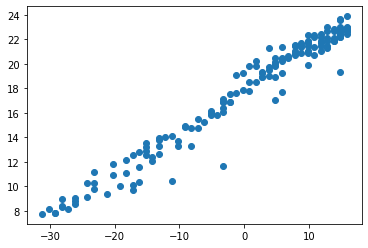

In [28]:
X = X - X.mean()
plt.scatter(X, Y)

In [29]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 348.4644
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 312.0544
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 247.8364
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 187.6870
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 171.8643
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 119.6291
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 95.1993
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 82.6395
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 45.8823
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 32.4462
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 33.9797
Epoch 12/200
6/6 [==============================] - 0s 3ms/step - loss: 21.7777
Epoch 13/200
6/6 [=========================

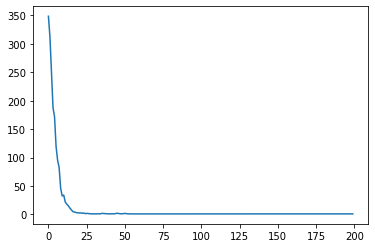

In [30]:
plt.plot(r.history['loss'], label='loss')

In [31]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.35159358]], dtype=float32), array([17.765982], dtype=float32)]


In [32]:
slope = model.layers[0].get_weights()[0][0, 0]
print(slope)

0.35159358


# Proof Moore's law

In [33]:
time_to_double = np.log(2) / slope
print(time_to_double)

1.9714443392982075


# Making predictions

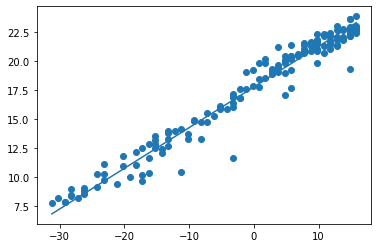

In [34]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

# Manual calculations

In [35]:
w, b = model.layers[0].get_weights()
X = X.reshape(-1, 1)
Yhat2 = (X.dot(w) + b).flatten()
np.allclose(Yhat, Yhat2)

True